## 1. Import all the nessessary imports

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

# import necessary modules from keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

Using TensorFlow backend.


## 2. Import the IMBD dataset, which is built into keras

In [2]:
from keras.datasets import imdb

(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)

## 3. Set up data and targets

In [3]:
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

## 4. Vectorize the results to suit the NN

In [4]:
# Vectorize reviews with fewer than 10,000 words and pad the excess with zeros
# Every input to the NN needs to be the same size
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

data = vectorize(data)
targets = np.array(targets).astype("float32")

## 5. Assign the testing and training sets

In [5]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

## 6. Set up the layers and model

In [6]:
# Set the Model to Sequential
model = models.Sequential()

# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))

# Prints a summary of how the model currently looks
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
_________________________________________________________________


## 7. Configure and Train the model

In [7]:
# Configure the model for training
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

# Train the model with the training set against the validated test set
# Epoch of size 2 and a batch size of 500 - model overfits if and larger
results = model.fit(
 train_x, train_y,
 epochs= 20,
 batch_size = 50,
 validation_data = (test_x, test_y)
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 34s 853us/step - loss: 0.3225 - acc: 0.8630 - val_loss: 0.2652 - val_acc: 0.8920
Epoch 2/20
40000/40000 [==============================] - 35s 884us/step - loss: 0.2008 - acc: 0.9224 - val_loss: 0.2725 - val_acc: 0.8897
Epoch 3/20
40000/40000 [==============================] - 26s 639us/step - loss: 0.1435 - acc: 0.9471 - val_loss: 0.3004 - val_acc: 0.8867
Epoch 4/20
40000/40000 [==============================] - 23s 572us/step - loss: 0.1064 - acc: 0.9610 - val_loss: 0.3688 - val_acc: 0.8825
Epoch 5/20
40000/40000 [==============================] - 22s 558us/step - loss: 0.0807 - acc: 0.9701 - val_loss: 0.3953 - val_acc: 0.8792
Epoch 6/20
40000/40000 [==============================] - 22s 555us/step - loss: 0.0652 - acc: 0.9752 - val_loss: 0.4381 - val_acc: 0.8809
Epoch 7/20
40000/40000 [==============================] - 24s 602us/step - loss: 0.0567 - acc: 0.9792 - val_loss: 0.

## 8. Evaulate and print the mean results

In [8]:
# Evaluate and print
print("Test-Accuracy:", np.mean(results.history["val_acc"]))

Test-Accuracy: 0.8812999954819679


## 9. Plot out graph of the results

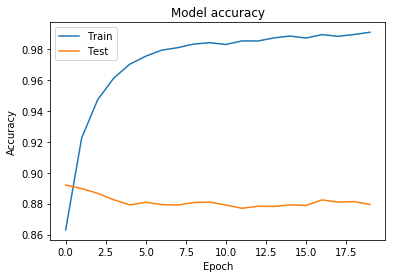

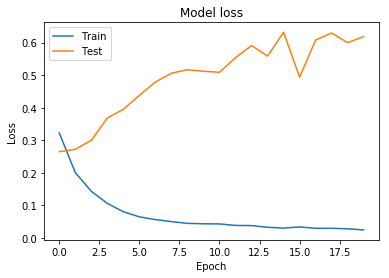

In [9]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()